<a href="https://colab.research.google.com/github/Skygoat23/Entregas/blob/main/PrimeraEntrega%2BAronne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Presentación del Proyecto 

###Coderhouse 2023 - Comisión 48610. 
#####Profesor: Fernando Caracebo
#####Tutor: Nazareno Martincevich
#####Autor: [Nicolas Aronne](https://)

# Problema Comercial
Las buenas prácticas alimenticias están siendo tendencia en un mundo donde las personas se vuelven sedentarias, donde los alimentos procesados abundan en el mercado y los problemas cardíacos se incrementan drásticamente.

  En Argentina tenemos vigente una ley de etiquetado frontal, donde se mencionan explicitamente los alimentos con exceso en calorías, grasas, azúcares y sodio.

Es interesante en ese sentido presentar soluciones a problemas alimenticios. 

# Definición del Objetivo

## Los objetivos perseguidos son:

*   Clasificación de alimentos según su contenido nutricional: Entrenar un modelo de clasificación para identificar automáticamente el tipo de alimento (frutas, verduras, carnes, etc.) basado en su información nutricional. También clasificar los alimentos en grupos de acuerdo a su valor nutricional, como alimentos ricos en proteínas, alimentos con alto contenido de grasas, etc.
*   Predicción de calorías: Utilizando técnicas de regresión, predecir el número de calorías en los alimentos a partir de su información nutricional. 
* Detección de alimentos no saludables: identificar patrones en los datos nutricionales que sean comunes en alimentos poco saludables. De esta manera, determinar qué alimentos tienen un alto contenido de grasas, sodio o azúcares, y sugerir alternativas más saludables.
* Recomendaciones personalizadas de alimentos: Con información adicional (otro dataset) sobre las personas que van a consumir los alimentos (por ejemplo, edad, género, altura, peso, nivel de actividad física), poder recomendar alimentos que satisfagan sus necesidades nutricionales específicas.







# Usuarios del modelo o Enfoque comercial.

El modelo está pensado para ser usados por profesionales de la nutrición, como asi también cualquier persona que quiera controlar su dieta o clasificar alimentos de acuerdo a ciertos requisitos, o predecir las calorías de los alimentos a partir de su información nutricional. 

# Contexto Análitico

El dataset fue obtenido de Kaggle.com, consta de 9.318 alimentos con más de 20 cualidades nutricionales.

In [346]:
#Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [347]:
#Leo el archivo csv desde un repositor de Github.
food = pd.read_csv("https://raw.githubusercontent.com/Skygoat23/DataScienceCoderhouse/main/food.csv")

# Analisis Exploratorio de Datos (EDA)

In [348]:
#El método head te permite visualizar las primeras filas del dataset
food.head()

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
0,1001,butter with salt,717.0,0.85,51.368,81.11,0.06,0.0,0.06,24.0,...,0.0,0.005,0.034,0.042,0.003,3.0,0.17,684.0,2.32,0.0
1,1002,butter whipped w salt,718.0,0.49,45.390,78.30,2.87,0.0,0.06,23.0,...,0.0,0.007,0.064,0.022,0.008,4.0,0.07,683.0,1.37,0.0
2,1003,butter oil anhydrous,876.0,0.28,61.924,99.48,0.00,0.0,0.00,4.0,...,0.0,0.001,0.005,0.003,0.001,0.0,0.01,840.0,2.8,0.0
3,1004,cheese blue,353.0,21.40,18.669,28.74,2.34,0.0,0.50,528.0,...,0.0,0.029,0.382,1.016,0.166,36.0,1.22,198.0,0.25,0.5
4,1005,cheese brick,371.0,23.24,18.764,29.68,2.79,0.0,0.51,674.0,...,0.0,0.014,0.351,0.118,0.065,20.0,1.26,292.0,0.26,0.5


In [349]:
#Conozco la cantidad de filas y columnas del dataset
food.shape

(9318, 29)

In [350]:
#Conozco el título de cada columna del dataset
food.columns

Index(['NDB_No', 'Descrip', 'Energy_kcal', 'Protein_g', 'Saturated_fats_g',
       'Fat_g', 'Carb_g', 'Fiber_g', 'Sugar_g', 'Calcium_mg', 'Iron_mg',
       'Magnesium_mg', 'Phosphorus_mg', 'Potassium_mg', 'Sodium_mg', 'Zinc_mg',
       'Copper_mcg', 'Manganese_mg', 'Selenium_mcg', 'VitC_mg', 'Thiamin_mg',
       'Riboflavin_mg', 'Niacin_mg', 'VitB6_mg', 'Folate_mcg', 'VitB12_mcg',
       'VitA_mcg', 'VitE_mg', 'VitD2_mcg'],
      dtype='object')

In [351]:
#Conozco los tipos de datos de cada columna
food.dtypes

NDB_No               object
Descrip              object
Energy_kcal         float64
Protein_g           float64
Saturated_fats_g    float64
Fat_g               float64
Carb_g              float64
Fiber_g             float64
Sugar_g             float64
Calcium_mg          float64
Iron_mg             float64
Magnesium_mg         object
Phosphorus_mg       float64
Potassium_mg        float64
Sodium_mg           float64
Zinc_mg             float64
Copper_mcg          float64
Manganese_mg        float64
Selenium_mcg        float64
VitC_mg             float64
Thiamin_mg          float64
Riboflavin_mg       float64
Niacin_mg           float64
VitB6_mg            float64
Folate_mcg          float64
VitB12_mcg          float64
VitA_mcg            float64
VitE_mg              object
VitD2_mcg           float64
dtype: object

In [352]:
#este método me permite obtener el máximo de la Variable Dependiente
food.Energy_kcal.max()

902.0

In [353]:
#Mascara Booliana para filtrar los alimentos del dataset que tengan Energy_kcal = 902
food.loc[food["Energy_kcal"]==902]

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
633,4001,fat beef tallow,902.0,0.0,49.800,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.7,0.7
634,4002,lard,902.0,0.0,39.200,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,2.5
687,4520,fat mutton tallow,902.0,0.0,47.300,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,0.7
724,4589,fish oil cod liver,902.0,0.0,22.608,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30000.0,0,250.0
725,4590,fish oil herring,902.0,0.0,21.290,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
726,4591,fish oil menhaden,902.0,0.0,30.427,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
727,4592,fish oil menhaden fully hydr,902.0,0.0,95.600,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
728,4593,fish oil salmon,902.0,0.0,19.872,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
729,4594,fish oil sardine,902.0,0.0,29.892,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8.3


## Insights

Estos son los alimentos que tienen el máximo registrado de calorías es decir 902.

In [354]:
#este método me permite obtener el mínimo de la Variable Dependiente
food.Energy_kcal.min()

0.0

In [355]:
#Mascara Booliana para filtrar los alimentos del dataset que tengan Energy_kcal = 0
food.loc[food["Energy_kcal"]==0]

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
295,2047,salt table,0.0,0.0,0.000,0.0,0.00,0.0,0.00,24.0,...,0.0,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0,0.0
311,2074,seasoning mix dry sazon coriander annatto,0.0,0.0,0.000,0.0,0.00,0.0,0.00,0.0,...,0.0,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0,0.0
334,3024,babyfood h2o btld gerber wo added fluoride,0.0,0.0,0.000,0.0,0.00,0.0,0.00,0.0,...,0.0,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0,0.0
4174,14073,beverages zevia cola,0.0,0.0,0.000,0.0,1.13,0.0,0.00,0.0,...,0.0,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0,0.0
4175,14074,beverages zevia cola caffeine free,0.0,0.0,0.000,0.0,1.13,0.0,0.00,0.0,...,0.0,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0,0.0
4176,14075,beverage gmbh co kg gerolsteiner naturally sp...,0.0,0.0,0.000,0.0,0.00,0.0,0.00,33.0,...,0.0,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0,0.0
4177,14076,beverages icelandic glacial nat spring h2o,0.0,0.0,0.000,0.0,0.00,0.0,0.00,1.0,...,0.0,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0,0.0
4180,14082,bev gerolsteiner brunnen naturally sparkling m...,0.0,0.0,0.000,0.0,0.00,0.0,0.00,33.0,...,0.0,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0,0.0
4189,14093,beverage coca-cola co glaceau vit h2o revive ...,0.0,0.0,0.000,0.0,0.00,0.0,0.00,0.0,...,10.2,0.000,0.000,3.384,0.338,0.0,1.02,0.0,0,0.0
4209,14121,beverages carb club soda,0.0,0.0,0.000,0.0,0.00,0.0,0.00,5.0,...,0.0,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0,0.0


## Insights
Estos son los alimentos que tienen 0 calorías.

In [356]:
#isnull().sum() permite determinar si las columnas contienen datos nulos
food.isnull().sum()

NDB_No              0
Descrip             0
Energy_kcal         0
Protein_g           0
Saturated_fats_g    0
Fat_g               0
Carb_g              0
Fiber_g             0
Sugar_g             0
Calcium_mg          0
Iron_mg             0
Magnesium_mg        0
Phosphorus_mg       0
Potassium_mg        0
Sodium_mg           0
Zinc_mg             0
Copper_mcg          0
Manganese_mg        0
Selenium_mcg        0
VitC_mg             0
Thiamin_mg          0
Riboflavin_mg       0
Niacin_mg           0
VitB6_mg            0
Folate_mcg          0
VitB12_mcg          0
VitA_mcg            0
VitE_mg             0
VitD2_mcg           0
dtype: int64

## Insights
El dataset no contiene datos nulos lo que facilita el proceso de Data Wrangling

In [357]:
filanulos=0
indicefilanulo=[]
for i in range(9318):
  nulos=food.iloc[i,:].isnull().sum()
  if nulos > 0:
    filanulos=filanulos+1
    indicefilanulo.append(i)

In [358]:
#Imprimo las filas y los índices de las filas nulas
print(filanulos)
print(indicefilanulo)

0
[]


In [359]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9318 entries, 0 to 9317
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NDB_No            9318 non-null   object 
 1   Descrip           9318 non-null   object 
 2   Energy_kcal       9318 non-null   float64
 3   Protein_g         9318 non-null   float64
 4   Saturated_fats_g  9318 non-null   float64
 5   Fat_g             9318 non-null   float64
 6   Carb_g            9318 non-null   float64
 7   Fiber_g           9318 non-null   float64
 8   Sugar_g           9318 non-null   float64
 9   Calcium_mg        9318 non-null   float64
 10  Iron_mg           9318 non-null   float64
 11  Magnesium_mg      9318 non-null   object 
 12  Phosphorus_mg     9318 non-null   float64
 13  Potassium_mg      9318 non-null   float64
 14  Sodium_mg         9318 non-null   float64
 15  Zinc_mg           9318 non-null   float64
 16  Copper_mcg        9318 non-null   float64


In [360]:
#Estadistica descriptiva de las variables
food.describe()

,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,Iron_mg,Phosphorus_mg,...,Selenium_mcg,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitD2_mcg
count,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,...,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000
mean,220.897683,11.321644,3.305349,10.202202,21.504095,2.149810,6.522893,73.626774,2.664721,154.555758,...,12.911910,8.635112,0.201506,0.226599,3.300760,1.900472,36.649891,1.135288,89.133407,0.343880
std,169.034417,10.438045,6.298633,15.575583,26.998286,4.453051,13.496676,198.130979,5.631967,198.991857,...,27.845701,64.147308,0.494901,0.427369,4.647165,15.738592,162.025154,4.158457,750.651532,3.003964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86.000000,2.332500,0.136000,0.820000,0.000000,0.000000,0.000000,9.000000,0.490000,36.000000,...,0.100000,0.000000,0.030000,0.042250,0.383000,0.037000,0.000000,0.000000,0.000000,0.000000
50%,183.000000,8.100000,1.319000,4.800000,8.720000,0.400000,0.460000,19.935000,1.300000,131.000000,...,4.300000,0.000000,0.075000,0.145000,2.000000,0.125000,7.000000,0.010000,1.000000,0.000000
75%,330.582000,19.870000,4.000000,13.210000,32.445000,2.500000,5.487500,64.000000,2.597500,216.000000,...,21.500000,2.780000,0.216750,0.253000,4.938750,0.366000,19.000000,1.110000,19.000000,0.000000
max,902.000000,88.320000,95.600000,100.000000,100.000000,79.000000,99.800000,7364.000000,123.600000,9918.000000,...,1917.000000,2732.000000,23.375000,17.500000,127.500000,316.000000,2875.000000,98.890000,30000.000000,250.000000


In [361]:
#Máscara booliana para conocer los alimentos que tienen mas de 900 calorias
food.loc[food.Energy_kcal > 900]

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
633,4001,fat beef tallow,902.0,0.0,49.800,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.7,0.7
634,4002,lard,902.0,0.0,39.200,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,2.5
687,4520,fat mutton tallow,902.0,0.0,47.300,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,0.7
724,4589,fish oil cod liver,902.0,0.0,22.608,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30000.0,0,250.0
725,4590,fish oil herring,902.0,0.0,21.290,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
726,4591,fish oil menhaden,902.0,0.0,30.427,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
727,4592,fish oil menhaden fully hydr,902.0,0.0,95.600,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
728,4593,fish oil salmon,902.0,0.0,19.872,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
729,4594,fish oil sardine,902.0,0.0,29.892,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8.3


## Insights

Existen 9 alimentos con más de 900 kilocalorías.

In [362]:
# Código para crear una nueva columna en el dataset para Tratar de conseguir una segmentación preeliminar de los alimentos segun sus calorías 
food.loc[:,"CategoriaKcal"] = "Hipocalórico"
food.loc[food.Energy_kcal > 600, "CategoriaKcal"] = "Hipercalórico"
food.loc[food.Energy_kcal == 0, "CategoriaKcal"] = "Sin_Calorias"

In [363]:
#el método group by permite agrupar datos de acuerdo a cierto criterio para hacer cálculos. en este caso count()
food.groupby("CategoriaKcal").count()

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
CategoriaKcal,,,,,,,,,,,,,,,,,,,,,
Hipercalórico,225,225,225,225,225,225,225,225,225,225,...,225,225,225,225,225,225,225,225,225,225
Hipocalórico,9054,9054,9054,9054,9054,9054,9054,9054,9054,9054,...,9054,9054,9054,9054,9054,9054,9054,9054,9054,9054
Sin_Calorias,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39


## Insights

El 0.42% de los alimentos no tienen calorías.
El 2.41% de los alimentos tienen más de 600 calorías, por lo que han sido clasificados como "hipercalóricos".

# Hipótesis y Preguntas

1. Hay una relación directa entre las calorías y las grasas de un alimento. A mayor cantidad de grasas mayor, mayor calorías.
2. Tienen los alimentos altos en azúcar una relación con las calorias ?
3. Tienen los alimentos altos en sodio una relación con las calorias ?
4. Se pueden clasificar los alimentos ?

##Análisis Univariado

Text(0.5, 1.0, 'Histograma Kilocalorías')

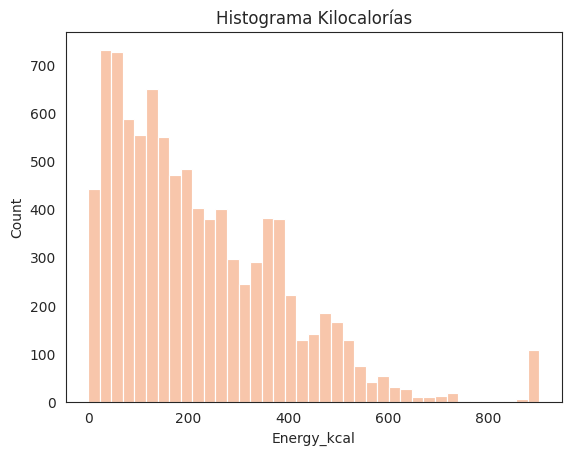

In [364]:
#Grafico un histograma de la variable Objetivo
sns.set_palette("rocket_r")
sns.set_style("white")
sns.histplot(data=food, x="Energy_kcal").set_title("Histograma Kilocalorías")


Text(0.5, 0, 'Kilocalorías')

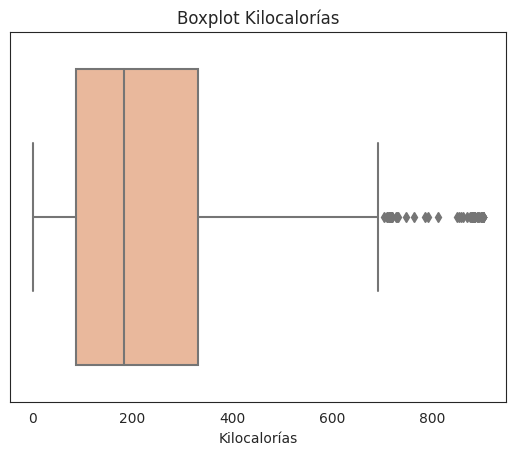

In [365]:
#Grafico un boxplot de la variable objetivo para conocer la distribucion de los datos.
sns.boxplot(data=food,x="Energy_kcal")
plt.title('Boxplot Kilocalorías',fontsize=12)
plt.xlabel('Kilocalorías',fontsize=10)


## Insights

Aparentemente la variable dependiente no presenta la apariencia de una distribución Normal.

La variable objetivo o dependiente concentra la mayor cantidad de sus datos entre 86 y 330. A simple vista no parece una distribución normal.

In [366]:
#El Método mean() determina el promedio. En este caso de una variable.
food.Energy_kcal.mean()


220.89768276454174

In [367]:
#El Método mean() determina la mediana.
food.Energy_kcal.median()

183.0

In [368]:
#quartiles
np.quantile(food.Energy_kcal,0.75)

330.582

In [369]:
np.quantile(food.Energy_kcal,0.25)

86.0

Text(0, 0.5, 'Azucares')

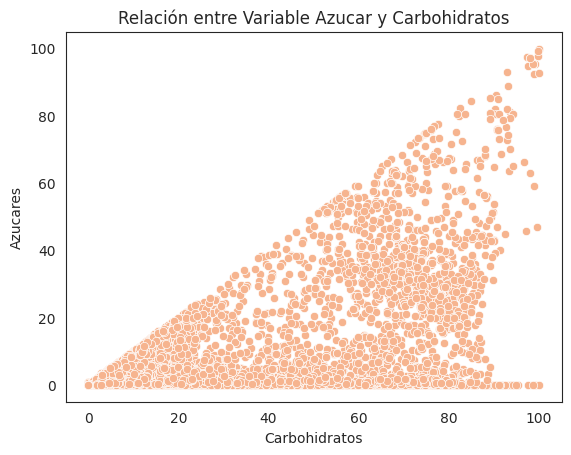

In [370]:
#Gráfico de Dispersión para ver la relación entre azúcares y carbohidratos 
sns.scatterplot(data=food, x="Carb_g", y="Sugar_g")
plt.title('Relación entre Variable Azucar y Carbohidratos',fontsize=12)
plt.xlabel('Carbohidratos',fontsize=10)
plt.ylabel('Azucares',fontsize=10)

## Insights

Observamos a la variable objetivo o dependiente, que concentra la mayor cantidad de sus datos entre 86 y 330. A simple vista no parece una distribución normal.

In [371]:
#Guardo en la variable Features las columnas del dataset
Features = ['Protein_g', 'Saturated_fats_g',
       'Fat_g', 'Carb_g', 'Fiber_g', 'Sugar_g', 'Calcium_mg', 'Iron_mg',
       'Magnesium_mg', 'Phosphorus_mg', 'Potassium_mg', 'Sodium_mg', 'Zinc_mg',
       'Copper_mcg', 'Manganese_mg', 'Selenium_mcg', 'VitC_mg', 'Thiamin_mg',
       'Riboflavin_mg', 'Niacin_mg', 'VitB6_mg', 'Folate_mcg', 'VitB12_mcg',
       'VitA_mcg', 'VitE_mg', 'VitD2_mcg']

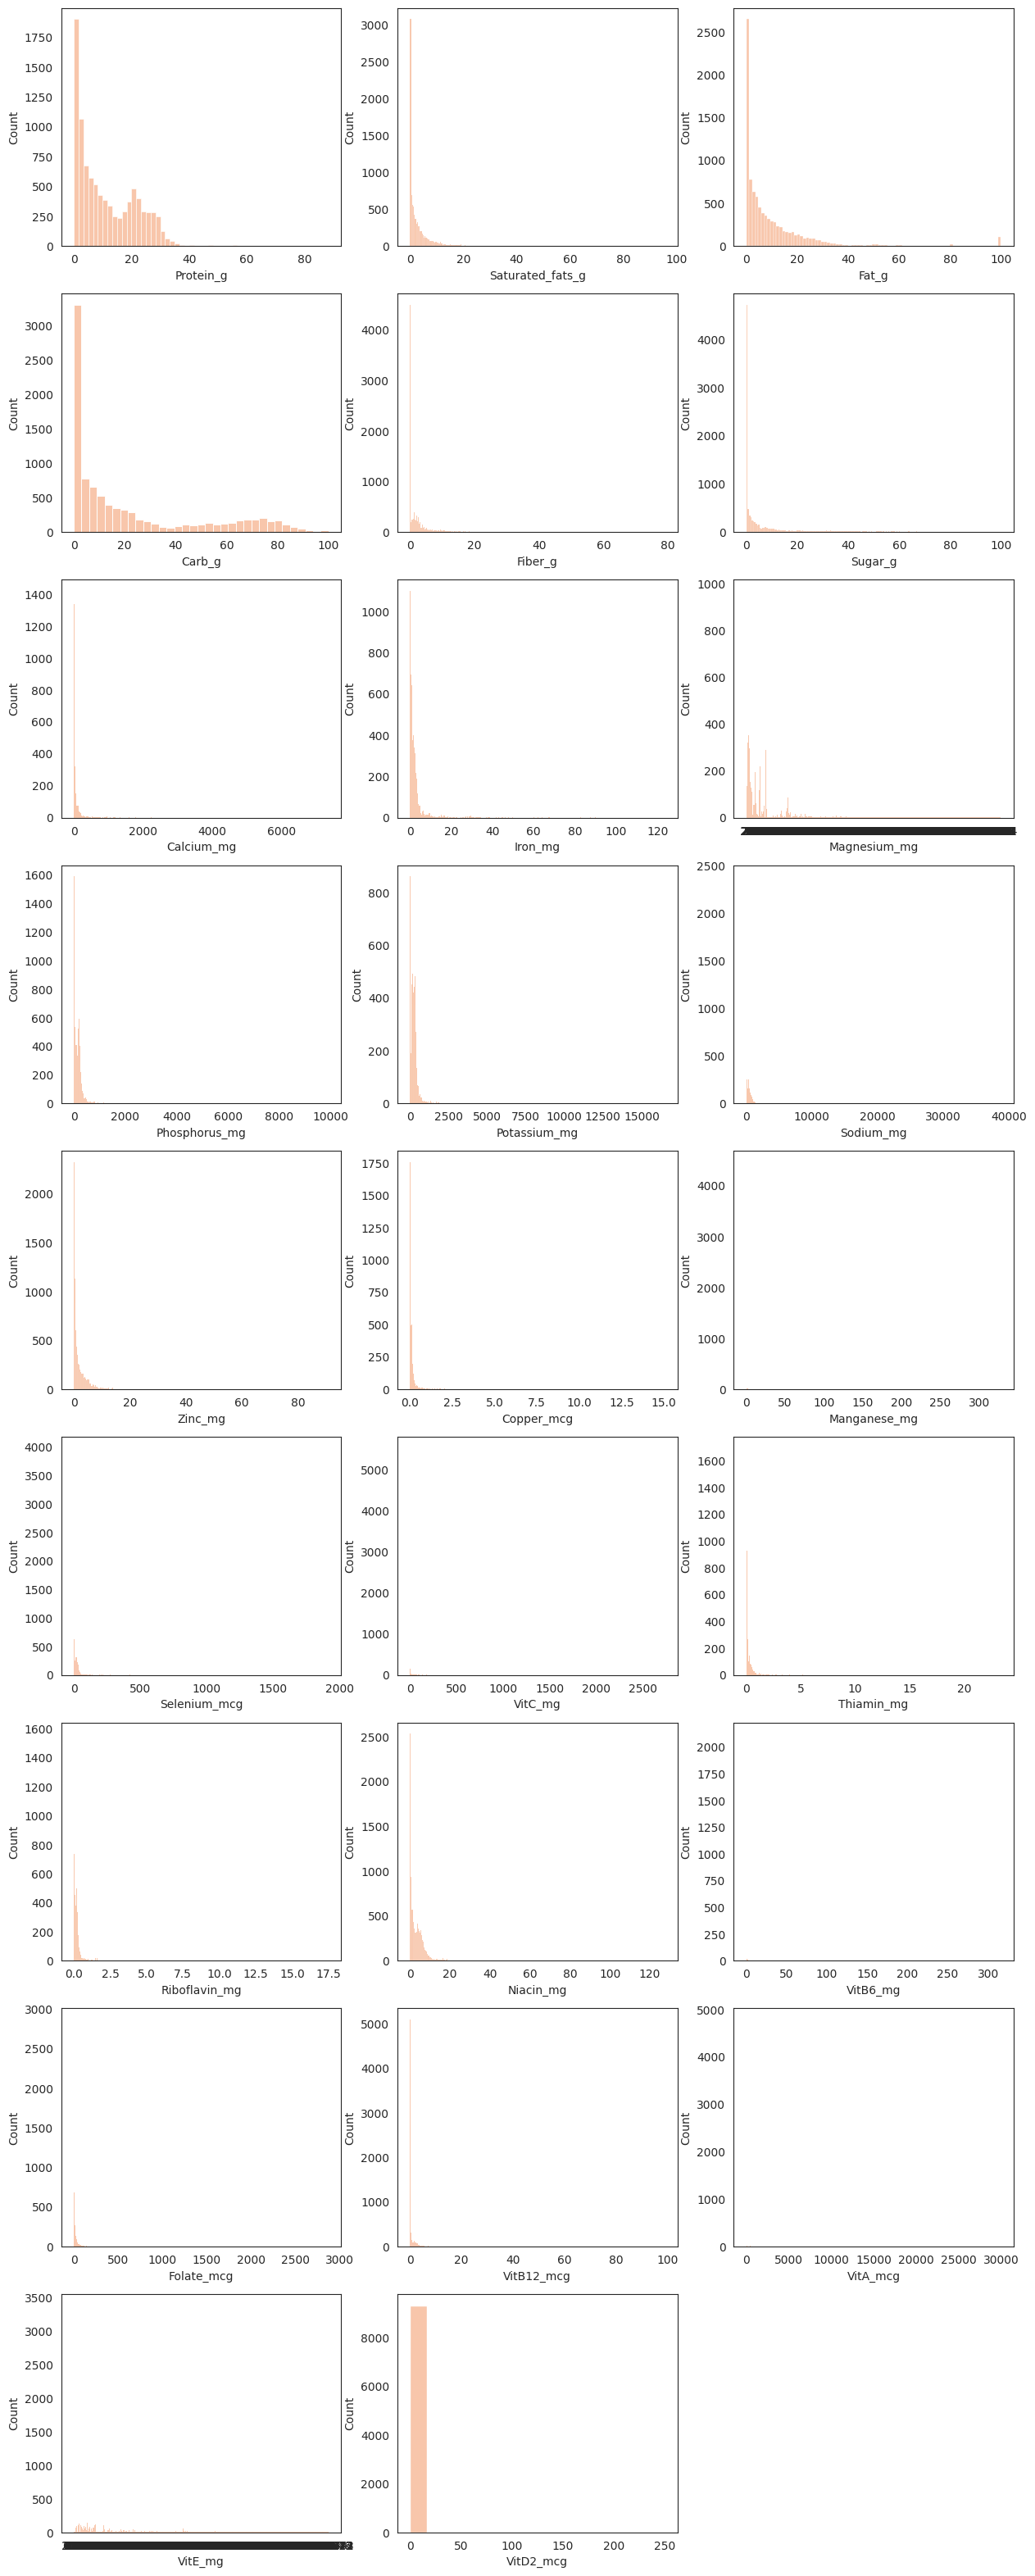

In [372]:
#Realizo una iteración con todas las variables para ver como se distribuyen los datos de cada una. Deseo hacerlo en una figura de 3 columnas y 9 filas.
enumerateFeatures = list(enumerate(Features))
plt.figure(figsize=(15,40))
for i in (enumerateFeatures):
  plt.subplot(9, 3, i[0]+1)
  sns.histplot(data=food, x=i[1])


In [373]:
#Value_counts() permite contar la frecuencia de datos agrupados por columna.
food.Protein_g.value_counts()

0.00     358
0.10      45
0.07      41
0.20      40
0.30      40
        ... 
53.57      1
2.93       1
15.49      1
35.20      1
19.24      1
Name: Protein_g, Length: 2735, dtype: int64

In [374]:
food.loc[food.Protein_g < 2 ].count()

NDB_No              2118
Descrip             2118
Energy_kcal         2118
Protein_g           2118
Saturated_fats_g    2118
Fat_g               2118
Carb_g              2118
Fiber_g             2118
Sugar_g             2118
Calcium_mg          2118
Iron_mg             2118
Magnesium_mg        2118
Phosphorus_mg       2118
Potassium_mg        2118
Sodium_mg           2118
Zinc_mg             2118
Copper_mcg          2118
Manganese_mg        2118
Selenium_mcg        2118
VitC_mg             2118
Thiamin_mg          2118
Riboflavin_mg       2118
Niacin_mg           2118
VitB6_mg            2118
Folate_mcg          2118
VitB12_mcg          2118
VitA_mcg            2118
VitE_mg             2118
VitD2_mcg           2118
CategoriaKcal       2118
dtype: int64

## Insights
En teoría todas las características presentan distribuciones sesgadas es decir, No NORMALES.

# Análisis Bivariado

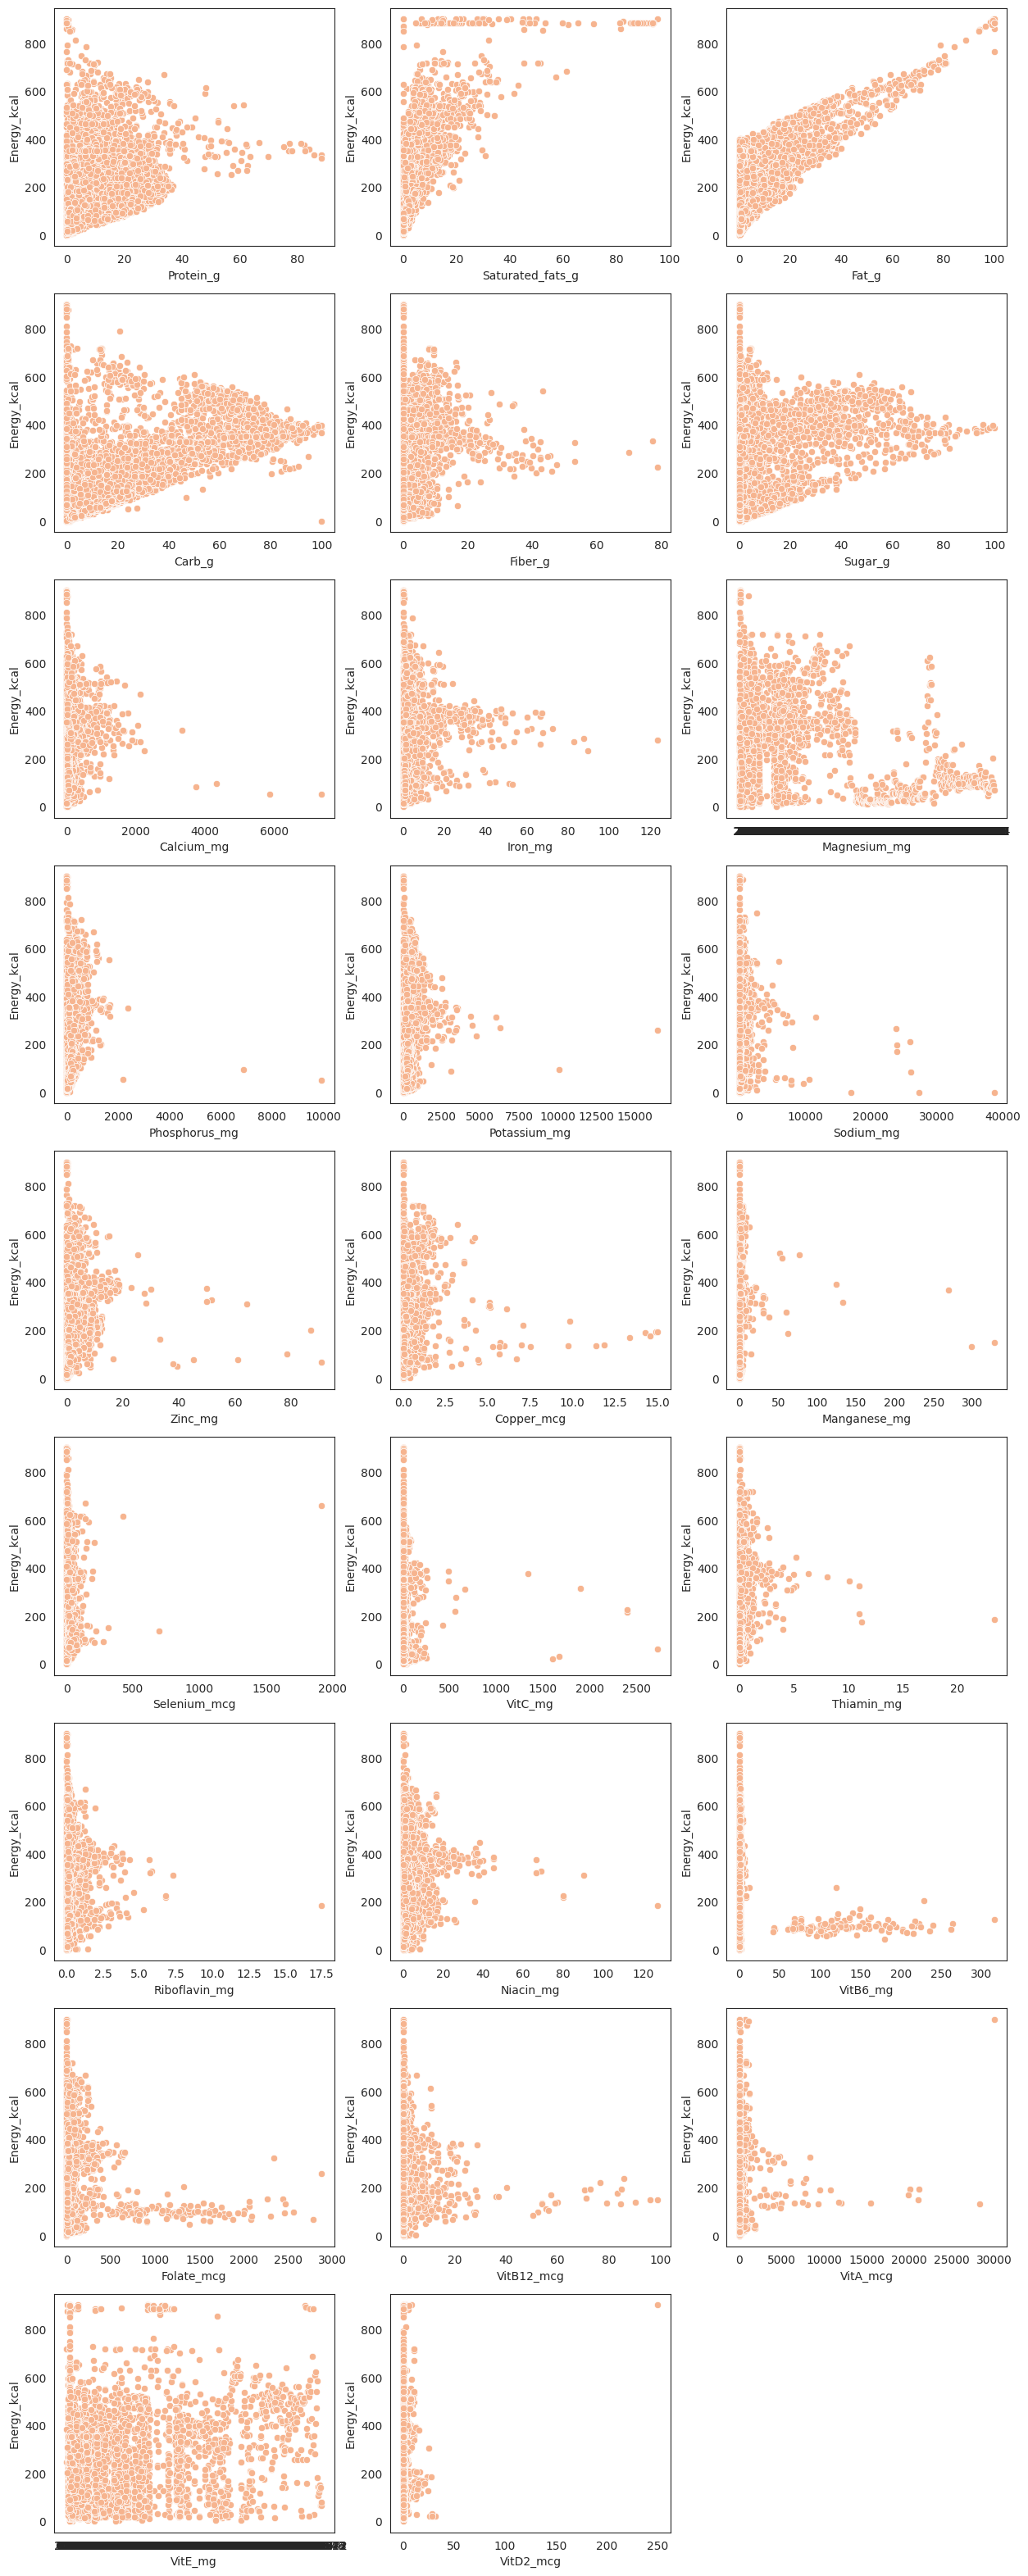

In [375]:
#Iteración para realizar gráficos de dispersión de cada una de las features con la variable dependiente.
enumerateFeatures = list(enumerate(Features))
plt.figure(figsize=(15,40))
for i in (enumerateFeatures):
  plt.subplot(9, 3, i[0]+1)
  sns.scatterplot(data=food, x=i[1], y="Energy_kcal")

## Insights


1.   La variable que aparentemente más relación lineal tiene con la variable Kcal es "Fat_g" donde se nota marcadamente la relación.
2.   Si bien no obecede a una correlación lineal, a medida que aumenta el contenido de proteinas, también aumentan las calorías.
3. Se observa que a mayor contenido de grasas saturadas, mayor es la cantidad de calorías.
4. Excepto por algunos datos escasos que denominamos outliers, existe una relación directa entre los carbohidratos y las calorías, pero el gráfico nos da la pauta que no es la variable más determinante, porque también evidencia que algunos alimentos con menor carbohidratos tienen menos calorías.
5. La misma relación positiva observamos entre las azúcares y las calorías.
6. Las demás variables aparentan no tener correlación con la variable Calorías.




Text(0, 0.5, 'Kilocalorías')

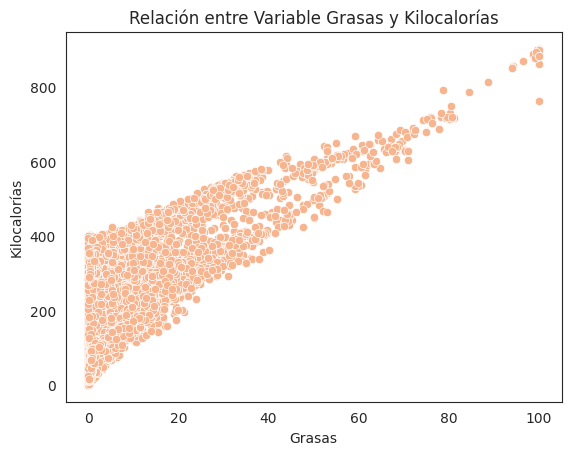

In [376]:
sns.scatterplot(data=food, x="Fat_g", y="Energy_kcal")
plt.title('Relación entre Variable Grasas y Kilocalorías',fontsize=12)
plt.xlabel('Grasas',fontsize=10)
plt.ylabel('Kilocalorías',fontsize=10)

## Insights

Se observa una relación directa entre las grasas y la cantidad de calorias.

## Otros análisis entre demás variables

Text(0.5, 1.0, 'Relación entre Azúcares y Carbohidratos')

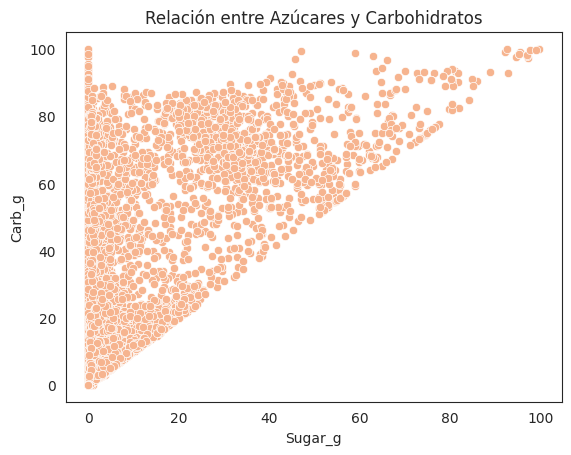

In [377]:
sns.scatterplot(data=food, x="Sugar_g", y="Carb_g")
plt.title('Relación entre Azúcares y Carbohidratos',fontsize=12)

## Insights 

El comportamiento entre las variables Carbohidratos y Azucar  tiene correlación. Aunque también evidenciamos, que algunos alimentos tienen más carbohidratos que otros pero no necesariamente más azúcares.

Text(0.5, 1.0, 'Relación entre Grasas Saturadas y Grasas')

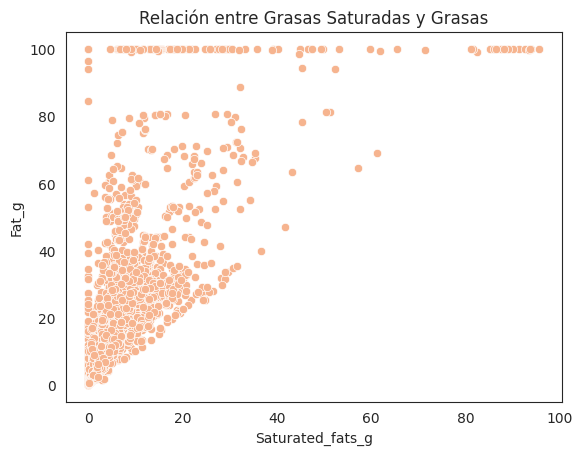

In [378]:
sns.scatterplot(data=food, x="Saturated_fats_g", y="Fat_g")
plt.title('Relación entre Grasas Saturadas y Grasas',fontsize=12)


## Insights

El comportamiento entre las variables Carbohidratos y Azucar tiene correlación. a mayor cantidad de grasas saturadas, mayor cantidad de grasas totales.

In [379]:
px.scatter(food,x='Fat_g',y='Energy_kcal',marginal_x='histogram',marginal_y='histogram')


Text(37.722222222222214, 0.5, 'Kilocalorías')

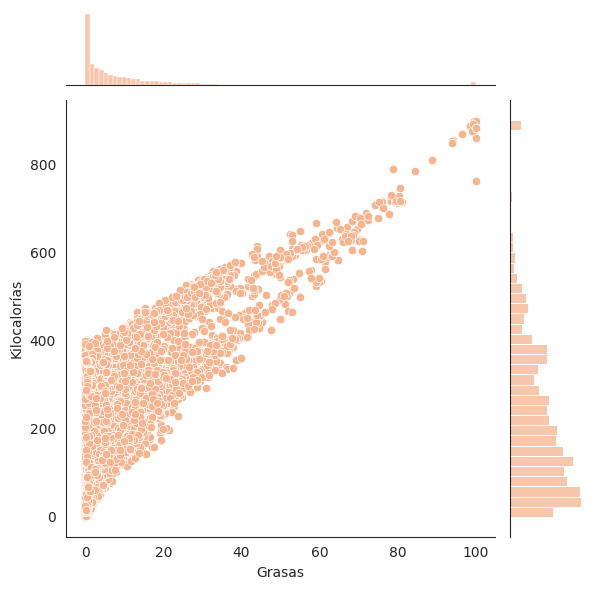

In [380]:
sns.jointplot(data=food, x="Fat_g", y="Energy_kcal")
plt.xlabel('Grasas',fontsize=10)
plt.ylabel('Kilocalorías',fontsize=10)

In [381]:
# Creo parcialmente un subdataset con los alimentos que tengan mas de 13 de grasas y conjuntamente más de 5.5 de azucares
fatandsugar = food.loc[(food.Fat_g > 13) & (food.Sugar_g > 5.5)]

In [382]:
fatandsugar.groupby("CategoriaKcal").count()

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
CategoriaKcal,,,,,,,,,,,,,,,,,,,,,
Hipercalórico,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Hipocalórico,621,621,621,621,621,621,621,621,621,621,...,621,621,621,621,621,621,621,621,621,621


Text(0.5, 0.98, 'Comparación de Boxplot')

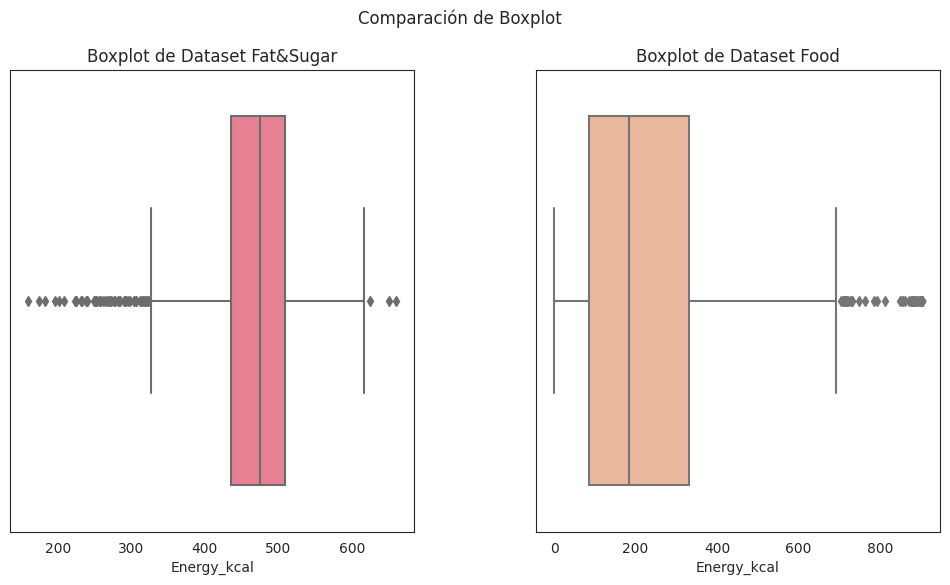

In [383]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=fatandsugar, x="Energy_kcal", ax=axs[0],color=colors[0])
colors = sns.color_palette("husl", n_colors=1)
sns.boxplot(data=food,x="Energy_kcal", ax=axs[1])
plt.subplots_adjust(wspace=0.3)
axs[0].set_title("Boxplot de Dataset Fat&Sugar")
axs[1].set_title("Boxplot de Dataset Food")
plt.suptitle("Comparación de Boxplot")

## Insights

La distribución de las calorías tiene un cambio notable entre el dataset completo y el subgrupo de Fat&Sugar.

#Análisis Multivariado

In [386]:
#El método Corr() muestra la correlación que existe entre las variables
food.corr()

,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,Iron_mg,Phosphorus_mg,...,Selenium_mcg,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitD2_mcg
Energy_kcal,1.000000,0.123942,0.618309,0.806055,0.502243,0.200460,0.317882,0.132143,0.198867,0.212798,...,0.055301,-0.040125,0.195355,0.161669,0.183186,-0.070258,-0.051274,-0.004838,0.025885,0.076817
Protein_g,0.123942,1.000000,0.056465,0.069703,-0.294872,-0.068246,-0.267470,0.047263,0.131324,0.455251,...,0.390645,-0.072510,0.104719,0.211560,0.395972,0.089906,0.117513,0.245252,0.026153,0.018031
Saturated_fats_g,0.618309,0.056465,1.000000,0.765033,-0.036133,-0.075656,0.072857,0.037049,-0.048102,0.037837,...,0.016010,-0.049304,-0.032006,-0.021223,-0.032306,-0.041484,-0.060051,-0.003358,0.013410,0.046211
Fat_g,0.806055,0.069703,0.765033,1.000000,-0.038775,-0.018583,0.005567,0.027434,-0.027308,0.085533,...,0.037717,-0.060547,0.006763,-0.022708,-0.007756,-0.053657,-0.059380,-0.014417,0.025704,0.074658
Carb_g,0.502243,-0.294872,-0.036133,-0.038775,1.000000,0.436181,0.614954,0.185724,0.335639,0.074279,...,-0.119835,0.064356,0.277530,0.222605,0.161748,-0.077909,-0.044156,-0.089799,0.000524,0.016987
Fiber_g,0.200460,-0.068246,-0.075656,-0.018583,0.436181,1.000000,0.094302,0.247401,0.374426,0.165456,...,-0.033363,0.065326,0.196943,0.137289,0.107110,-0.043905,0.069141,-0.057439,0.004478,-0.013168
Sugar_g,0.317882,-0.267470,0.072857,0.005567,0.614954,0.094302,1.000000,0.121574,0.108318,-0.056052,...,-0.131669,0.051453,0.092931,0.117667,0.023504,-0.048277,-0.066367,-0.049162,0.008494,0.055902
Calcium_mg,0.132143,0.047263,0.037049,0.027434,0.185724,0.247401,0.121574,1.000000,0.352206,0.557759,...,0.012469,0.093334,0.134523,0.216965,0.125564,-0.016213,0.019903,0.013057,0.036079,0.066102
Iron_mg,0.198867,0.131324,-0.048102,-0.027308,0.335639,0.374426,0.108318,0.352206,1.000000,0.225025,...,0.073773,0.058009,0.378716,0.478507,0.477702,-0.021338,0.040068,0.175343,0.101247,0.078308
Phosphorus_mg,0.212798,0.455251,0.037837,0.085533,0.074279,0.165456,-0.056052,0.557759,0.225025,1.000000,...,0.234789,-0.001345,0.179836,0.225708,0.265498,0.039335,0.097695,0.148635,0.054604,0.039893


<Axes: >

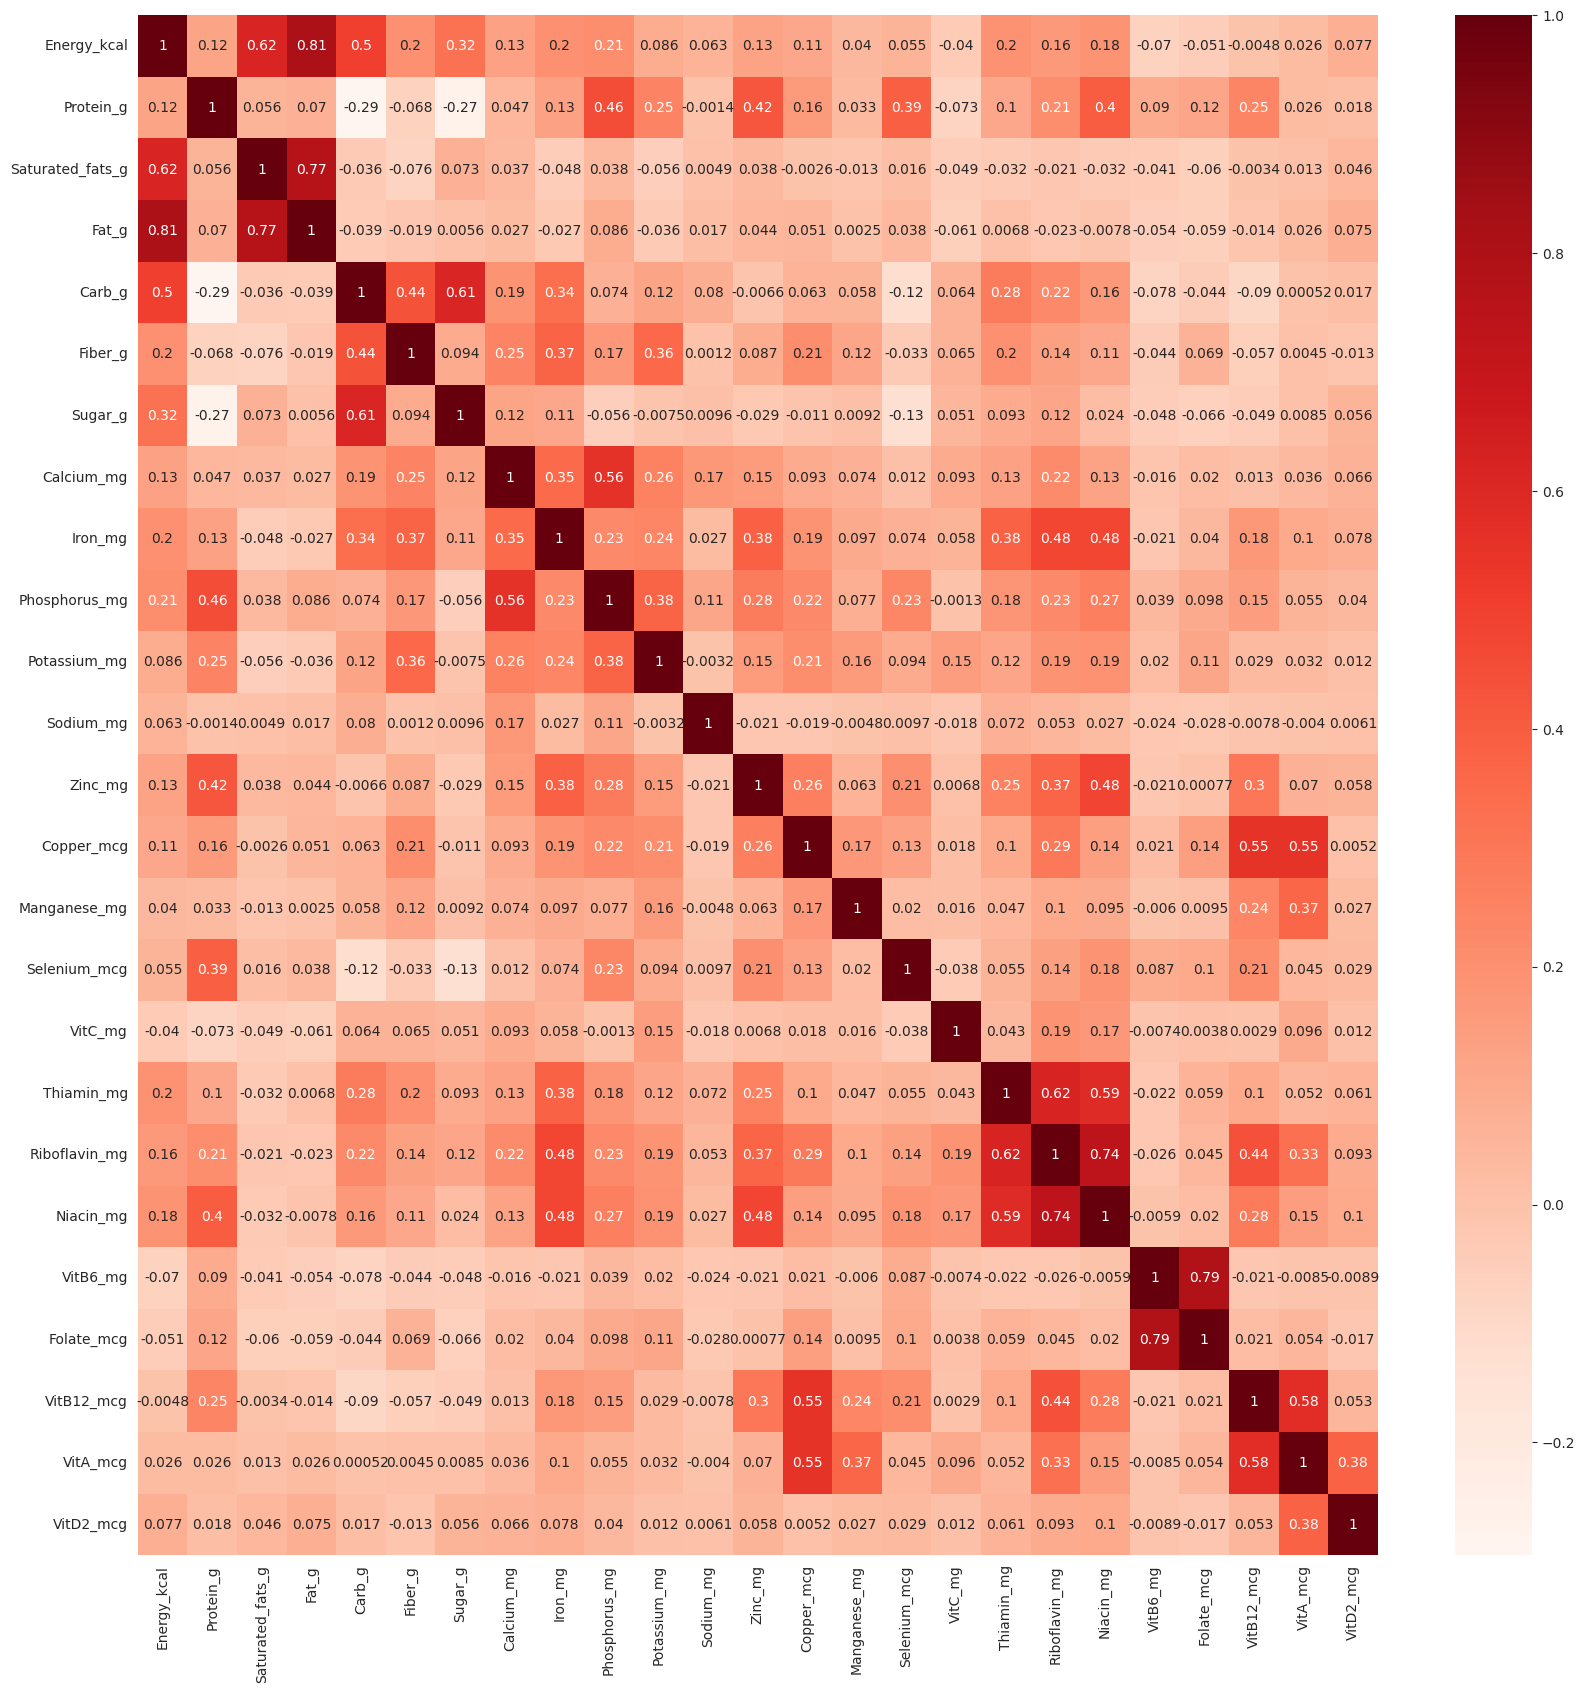

In [388]:
#Grafico las correlaciones con un gráfico de heatmap para que sea mas visible

plt.figure(figsize=(20,20))
sns.heatmap(food.corr(), annot=True, cmap='Reds')

### Insights

Podemos ver las correlación que existe entre cada una de las variables. Esto puede servir para hacer sub grupos de alimentos, y clasificarlos (Saludables, Nocivos, bajo en sodio, bajo en azucar, que aportan Fibra).

# Conclusiones

### Ayudar en el objetivo de bajar la obesidad, reducir los problemas cardíacos y concientizar acerca de los hábitos alimentarios, debería ser cada vez más prioridad en la sociedad. Este es el objetivo perseguido. Es por ellos que resulta imperante la clasificación y/o agrupación de alimentos y la medición de las calorias consumidas. Tarea a realizar con la creación de un modelo de machine learning para tal fin. Servir de soporte para estas causas a través de un modelo que clasifique los alimentos, que los agrupe y que prediga las calorías que contiene. Servir de apoyo a los profesionales en nutrición con así también a los usuarios que necesiten estructurar una dieta con ciertos requisitos.

# Algoritmos de Regresión y/o Clasificación

In [389]:
#Importo las librerías necesarias para la regresión Lineal
import statsmodels.formula.api as sm
from   scipy import stats
import numpy as np

## Regresión

De acuerdo a la correlación existente entre ambas variables planteo el modelo de Regresión

$$ Energy_Kcal ≈ \beta_0 + \beta_1 Fat_g $$

In [390]:
#Fiteo el modelo del regresion lineal
lr = sm.ols(formula = 'Energy_kcal~Fat_g', data = food).fit()

In [391]:
#obtengo los parámetros de la función
lr.params

Intercept    131.651510
Fat_g          8.747736
dtype: float64

In [392]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            Energy_kcal   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                 1.728e+04
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:13:25   Log-Likelihood:                -56136.
No. Observations:                9318   AIC:                         1.123e+05
Df Residuals:                    9316   BIC:                         1.123e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    131.6515      1.239    106.256      0.0

Text(0.5, 1.0, 'Relación entre la cantidad de grasa y la energía en alimentos y su linea de Regresión')

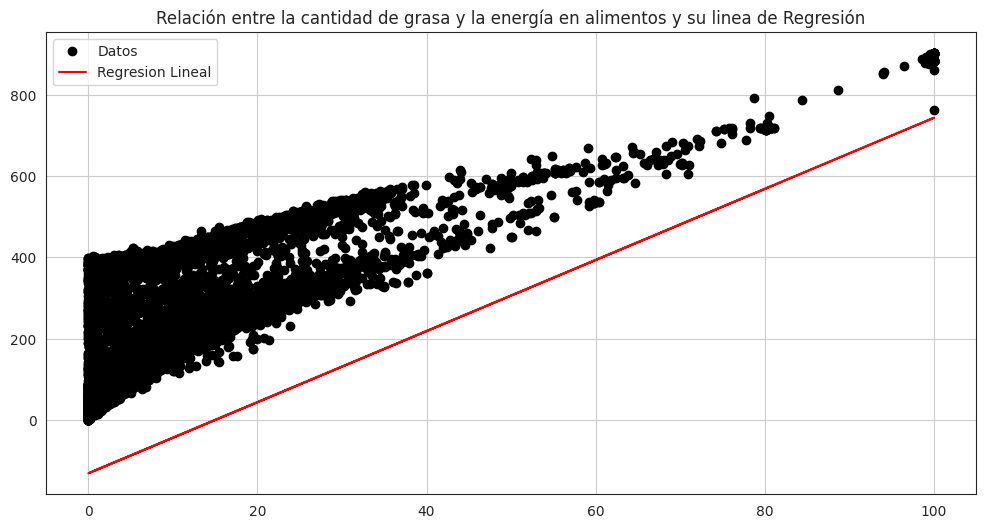

In [393]:
#grafico la regresion lineal
plt.figure(figsize=[12,6])
plt.plot(food.Fat_g,food.Energy_kcal,'ok')
plt.plot(food.Fat_g,food.Fat_g*8.7477 - 131.65,'r-')
plt.legend(['Datos','Regresion Lineal'])
plt.grid(True)
plt.title('Relación entre la cantidad de grasa y la energía en alimentos y su linea de Regresión')

## Insights
Considero que un R2 de 0.65 es insuficiente o no es una recta representativa que ajusta correctamente.

In [394]:
#Importo librería para hacer regresión lineal con Sklearn
from sklearn.datasets import make_regression

In [395]:
#Fiteo el modelo con 2 variables
lr2 = sm.ols(formula = 'Energy_kcal~Fat_g+Carb_g', data = food).fit()

In [398]:
#Nuevos parametros
lr2.params

Intercept    57.421605
Fat_g         8.972575
Carb_g        3.345226
dtype: float64

In [399]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:            Energy_kcal   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 6.675e+04
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:13:47   Log-Likelihood:                -48305.
No. Observations:                9318   AIC:                         9.662e+04
Df Residuals:                    9315   BIC:                         9.664e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.4216      0.649     88.472      0.0

## Insights

R2 = 0.935, con lo cual se ha mejorado bastante la performance respecto del modelo anterior de 0.65.

In [400]:
px.scatter_3d(x=food.Fat_g,y=food.Carb_g,z=food.Energy_kcal)

## Insights 
Agregando una variable más al análisis, el R2 no se modifica

In [401]:
#importo libreria para Modelar Regresion lineal multiple
from sklearn.linear_model import LinearRegression as LR

In [402]:
df = food.iloc[:,2:9]

In [403]:
#divido el dataset en variables independientes o features y variable dependiente
x = df.drop(['Energy_kcal'],axis=1)
y = df.Energy_kcal

In [404]:
model=LR()

In [405]:
model.fit(x,y)

LinearRegression()

In [406]:
model.coef_

array([ 4.02590732,  0.1659234 ,  8.76350307,  3.91419181, -1.50578752,
       -0.01609192])

In [407]:
model.intercept_

4.533297038933227

In [408]:
#Importo libreria para calcular R2
from sklearn.metrics import r2_score

In [409]:
ypred=model.predict(x)

In [410]:
r2_score(y,ypred)

0.9911623121793194

In [411]:
import matplotlib.pyplot as plt

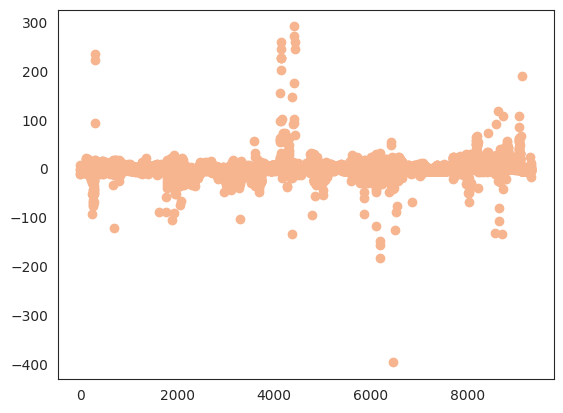

In [412]:
plt.plot(y-ypred,'o')

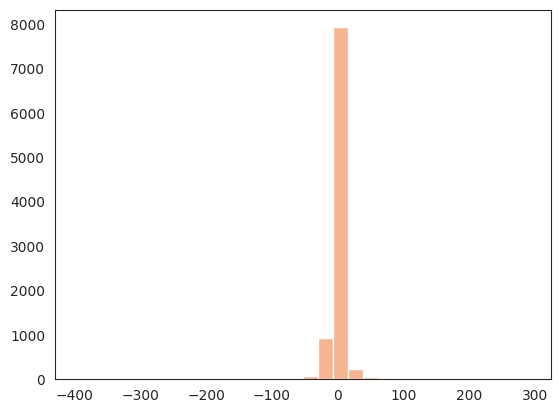

In [413]:
plt.hist(y-ypred,bins=30);

# Algoritmos de Clasificación

In [414]:
#Traspaso de columna categórica a columna binaria
dummies = pd.get_dummies(food['CategoriaKcal'])

In [415]:
#agrego nuevas columndas al dataset
food = pd.concat([food, dummies], axis=1)

# 1. Feature Selection


In [416]:
#Preselecciono 5 Features para entrenar un modelo de clasificación y la columna Hipercalórico como variable de Clasificacion
train_cols = ['Protein_g', 'Saturated_fats_g', 'Fat_g', 'Carb_g','Sugar_g']
Xc = food[train_cols]
yc = food['Hipercalórico']

In [417]:
#Hago el split de los datos entre entrenamiento y testeo

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xc, yc, test_size=0.20)

In [418]:
X_train.shape

(7454, 5)

In [419]:
X_train.shape[0]/food.shape[0]

0.7999570723331187

In [420]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

In [421]:
#Secuential Feature Selector; Foward=true
sfs = SFS(LogisticRegression(),
          k_features=4,
          cv = 3)

In [422]:
sfs.fit(X_train,y_train)

SequentialFeatureSelector(cv=3, estimator=LogisticRegression(), k_features=4)

In [423]:
# Las variables que se van a usar en el modelo final son 
sfs.k_feature_names_

('Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g')

# 2. Model Selection

In [424]:
#Seleccionamos el modelo que tenga el cross validation mayor
m1=LogisticRegression()
m2=KNeighborsClassifier(4)
m2b=KNeighborsClassifier(6)
m3=DecisionTreeClassifier()

In [425]:
#importo libreria para calcular los cross validations
from sklearn.model_selection import cross_val_score

In [426]:
cross_val_score(m1,X_train,y_train,cv=3).mean()

0.9990610328638497

In [427]:
cross_val_score(m2,X_train,y_train,cv=3).mean()

0.9979874955584284

In [428]:
cross_val_score(m2b,X_train,y_train,cv=3).mean()

0.9974508349074588

In [429]:
cross_val_score(m3,X_train,y_train,cv=3).mean()

0.9979877115619104

### Elijo el modelo de Regresión Logistica por tener el índice de CrossValidation mayor.

# Modelo : Regresión Logistica Con 4 variables 

In [430]:
#Depuro las caracteristicas selectas previamente
X_train_final=X_train.loc[:,['Protein_g',
 'Saturated_fats_g',
 'Fat_g',
 'Carb_g']]

In [431]:
X_test_final=X_test.loc[:,['Protein_g',
 'Saturated_fats_g',
 'Fat_g',
 'Carb_g']]

In [432]:
mf=LogisticRegression()
mf.fit(X_train_final,y_train)

LogisticRegression()

In [433]:
ypred_final=mf.predict(X_test_final)

# 3. Métricas de Evaluación. Acuracy

In [434]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix

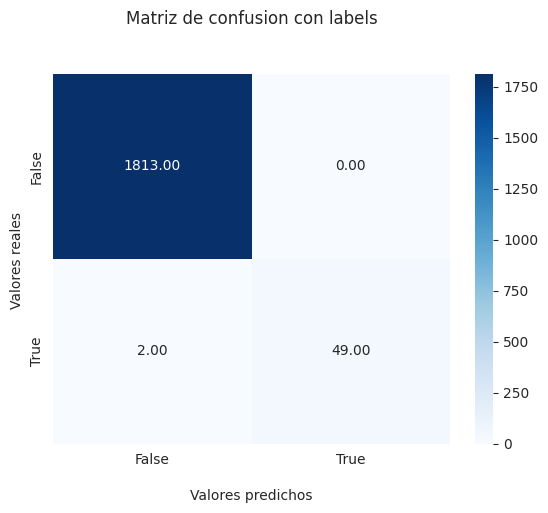

In [435]:
#La Matriz de confusión es una representación gráfica o tabular del rendimiento de un clasificador
cf_matrix = confusion_matrix(y_test, ypred_final)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt=".2f")
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [436]:
from sklearn.metrics import accuracy_score

In [437]:
accuracy_score(ypred_final,y_test)

0.9989270386266095

## Insights 
 
Se observaron 2 falsos negativos y 0 falsos positivos.
El acuracy indica que el modelo predice con una precisión alta.
##Importante !!! El modelo es casi perfecto, lo que da la pauta de que seguramente estemos en presencia de overfitting. Situación que voy a resolver en futuras entregas.​



# Otras Pruebas 

In [438]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [439]:
X2=food.loc[:,['Fat_g','Carb_g']].values
y2=food.Hipercalórico

clf = DecisionTreeClassifier()

clf.fit(X2, y2)

DecisionTreeClassifier()

In [440]:
#Introduzco un valor nuevo para testear el clasificador
test=np.array([80,40]).reshape(1, -1)
clf.predict(test)

array([1], dtype=uint8)

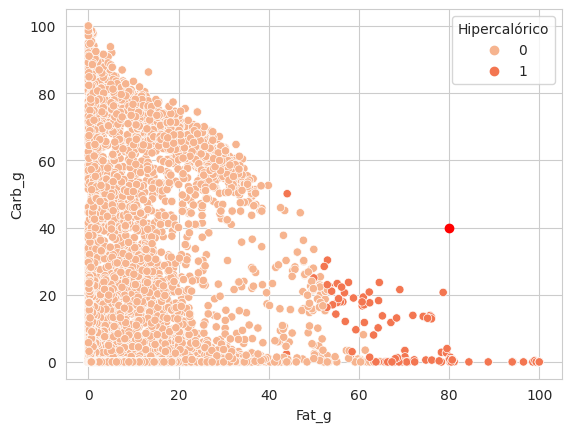

In [441]:
sns.scatterplot(data=food,x='Fat_g',y='Carb_g',hue='Hipercalórico')
plt.plot(test[0][0],test[0][1],'ro')
plt.grid(True)

## Insights

El Clasificador me clasificó correctamente el testeo, el dato aparece en rojo en el gráfico para distinguirlo.

In [442]:
food.describe()

,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,Iron_mg,Phosphorus_mg,...,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitD2_mcg,Hipercalórico,Hipocalórico,Sin_Calorias
count,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,...,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000
mean,220.897683,11.321644,3.305349,10.202202,21.504095,2.149810,6.522893,73.626774,2.664721,154.555758,...,0.226599,3.300760,1.900472,36.649891,1.135288,89.133407,0.343880,0.024147,0.971668,0.004185
std,169.034417,10.438045,6.298633,15.575583,26.998286,4.453051,13.496676,198.130979,5.631967,198.991857,...,0.427369,4.647165,15.738592,162.025154,4.158457,750.651532,3.003964,0.153513,0.165929,0.064563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86.000000,2.332500,0.136000,0.820000,0.000000,0.000000,0.000000,9.000000,0.490000,36.000000,...,0.042250,0.383000,0.037000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,183.000000,8.100000,1.319000,4.800000,8.720000,0.400000,0.460000,19.935000,1.300000,131.000000,...,0.145000,2.000000,0.125000,7.000000,0.010000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,330.582000,19.870000,4.000000,13.210000,32.445000,2.500000,5.487500,64.000000,2.597500,216.000000,...,0.253000,4.938750,0.366000,19.000000,1.110000,19.000000,0.000000,0.000000,1.000000,0.000000
max,902.000000,88.320000,95.600000,100.000000,100.000000,79.000000,99.800000,7364.000000,123.600000,9918.000000,...,17.500000,127.500000,316.000000,2875.000000,98.890000,30000.000000,250.000000,1.000000,1.000000,1.000000


In [448]:
#Creo parcialmente un subdataset con los alimentos Saludables
Saludables = food.loc[(food.Saturated_fats_g < 3) & (food.Fiber_g > 2)]

In [444]:
#Código para crear una nueva columna en el dataset para Tratar de conseguir una segmentación preeliminar de los alimentos saludables
food.loc[:,"Clasificacion2"] = "-"
food.loc[(food.Saturated_fats_g < 3) & (food.Fiber_g > 2), "Clasificacion2"] = "Saludables"

In [445]:
#Traspaso de columna categórica a columna binaria
dummies2 = pd.get_dummies(food['Clasificacion2'])

In [446]:
#agrego nuevas columndas al dataset
food = pd.concat([food, dummies2], axis=1)